In [1]:
import numpy as np
from scipy.stats import norm

In [2]:
x = []
for i in range(10000):
    num = np.random.uniform()
    x.append(norm.ppf(num))

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

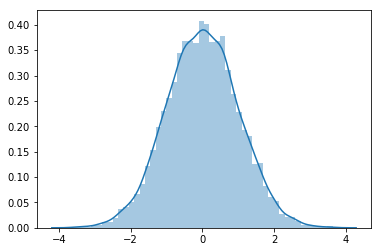

In [4]:
sns.distplot(x)
plt.show()

In [5]:
from scipy.special import beta, betainc, betaincinv
import numpy as np

class BetaPert:
    #Constructor
    def __init__(self, worst, most, best, gamma=4):
        self.alpha = 1 + gamma*((most-worst)/(best-worst))
        self.beta = 1 + gamma*((best-most)/(best-worst))
        self.a = worst
        self.b = most
        self.c = best

    def pdf(self, x):
        ret = ((x-self.a)**(self.alpha-1))*((self.c-x)**(self.beta-1))
        ret /= beta(self.alpha, self.beta)*((self.c-self.a)**(self.alpha+self.beta-1))
        return ret

    def cdf(self, x):
        z = (x-self.a)/(self.c-self.a)
        return betainc(self.alpha, self.beta,z)

    def generate_random(self):
        x = np.random.uniform()
        z = betaincinv(self.alpha, self.beta, x)
        return z*(self.c-self.a) + self.a


In [6]:
bp = BetaPert(worst=-1, most=1, best=4, gamma=4)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
x = []
for i in range(100000):
    x.append(bp.generate_random())

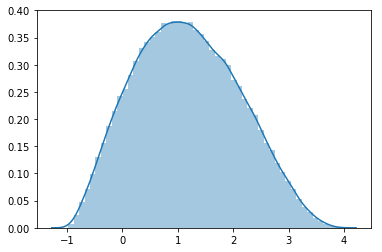

In [9]:
sns.distplot(x)
plt.show()

In [10]:
def price_estimate(coal, electricity, GDP_indonesia, ASP_domestic):
    p1 = (-1665.1*(coal)) + 10370
    p2 = (-1591.3*(electricity)) + 10370
    p3 = (3211.1*(GDP_indonesia)) + 10370
    p4 = (25847*(ASP_domestic)) + 10370
    return (p1+p2+p3+p4)/4

In [11]:
coal_dist = BetaPert(worst=-0.15, most=0.0, best=0.18)
el_dist = BetaPert(worst=-0.04, most=0.04, best=0.128)
GDP_dist = BetaPert(worst=-0.10, most=0, best=0.2)
ASP_dist = BetaPert(worst=-0.06, most=0.03, best=0.235)

#coal -15% 0% 18%
#electricity -4% 4% 12.8%
#GDP -10% 0% 20%
#ASP -6% 3% 23.5%

In [12]:
x = []
for i in range(1000000):
    a = coal_dist.generate_random()
    b = el_dist.generate_random()
    c = GDP_dist.generate_random()
    d = ASP_dist.generate_random()
    x.append(price_estimate(a,b,c,d))

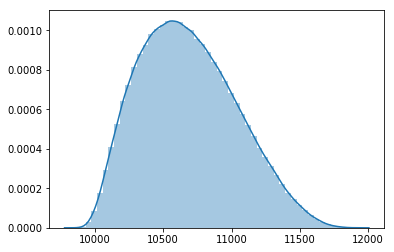

In [13]:
x = np.array(x)
sns.distplot(x)
plt.show()

In [14]:
np.sum(x<=9300)/1000000

0.0

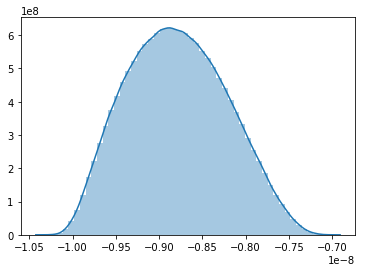

In [15]:
sns.distplot(-1/(x**2))
plt.show()

In [132]:
y = -1/(x**2)

In [133]:
np.sum(y <= (-1/(9300**2)))/10000

68.198099999999997

In [139]:
np.savetxt("D:\data.csv",x,delimiter=',')